# Importing packages

In [ ]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
source(here('Modules','unsupervised_learning.R'))
#install_all_packages()
load_library_packages()

# Decision Trees

## Output variable: Practice of exercise During

In [6]:
dim(pa_dataset)

[1] 1241   74

In [7]:
table(pa_dataset[, "PA_practice_during"])


dont_practice      practice 
          345           896 

There is a majority class, we should apply data augmentation. We chose kappa metrict to optimize becouse data is unbalanced.

### Creating the dataset partition

In [6]:
set.seed(2)
lista_treino <- createDataPartition(pa_dataset$PA_practice_during, p=0.7, list=FALSE)
treino <- pa_dataset[lista_treino,]
teste <- pa_dataset[-lista_treino,]

### Applying augmentation into the training set

In [7]:
treino.aug <- data_augmentation(
    train_data=treino,
    yname="PA_practice_during",
    maj_class = "practice",
    min_classes = c("dont_practice"),
    ycol=match("PA_practice_during",names(pa_dataset))
)

table(treino.aug[, "PA_practice_during"])



dont_practice      practice 
          627           627 

### Kappa metric without augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            50       47
  practice                 53      221
                                         
               Accuracy : 0.7305         
                 95% CI : (0.6822, 0.775)
    No Information Rate : 0.7224         
    P-Value [Acc > NIR] : 0.3890         
                                         
                  Kappa : 0.3157         
                                         
 Mcnemar's Test P-Value : 0.6171         
                                         
            Sensitivity : 0.4854         
            Specificity : 0.8246         
         Pos Pred Value : 0.5155         
         Neg Pred Value : 0.8066         
             Prevalence : 0.2776         
         Detection Rate : 0.1348         
   Detection Prevalence : 0.2615         
      Balanced Accuracy : 0.6550         
                                         
       'Positive' Class : d

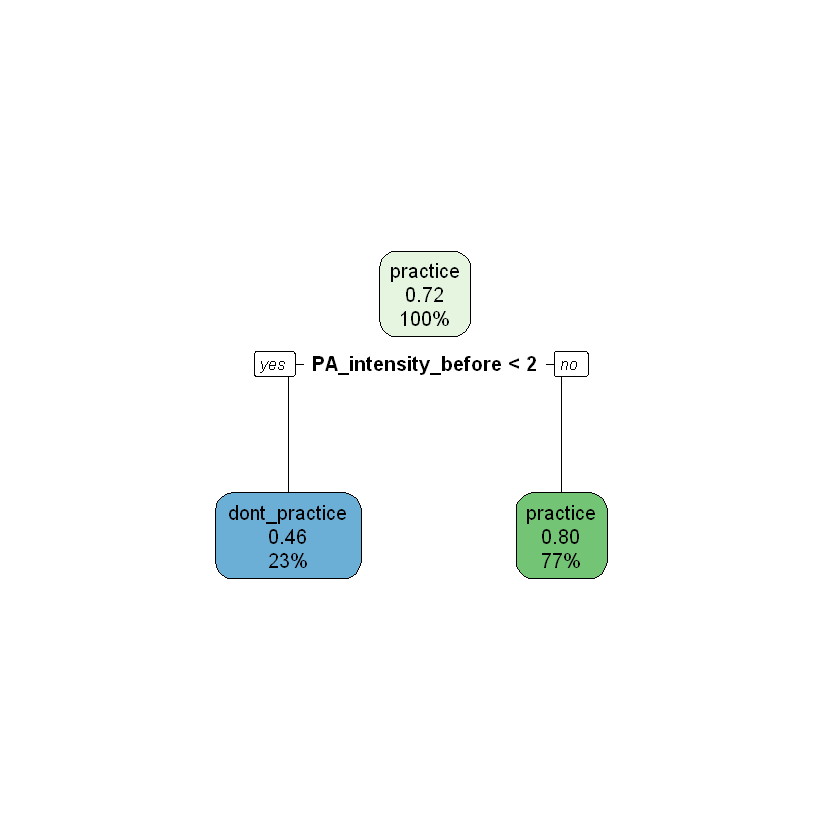

In [8]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel)



### Kappa metric with augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            67       94
  practice                 36      174
                                          
               Accuracy : 0.6496          
                 95% CI : (0.5987, 0.6981)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.9991          
                                          
                  Kappa : 0.2555          
                                          
 Mcnemar's Test P-Value : 5.756e-07       
                                          
            Sensitivity : 0.6505          
            Specificity : 0.6493          
         Pos Pred Value : 0.4161          
         Neg Pred Value : 0.8286          
             Prevalence : 0.2776          
         Detection Rate : 0.1806          
   Detection Prevalence : 0.4340          
      Balanced Accuracy : 0.6499          
                                          
       '

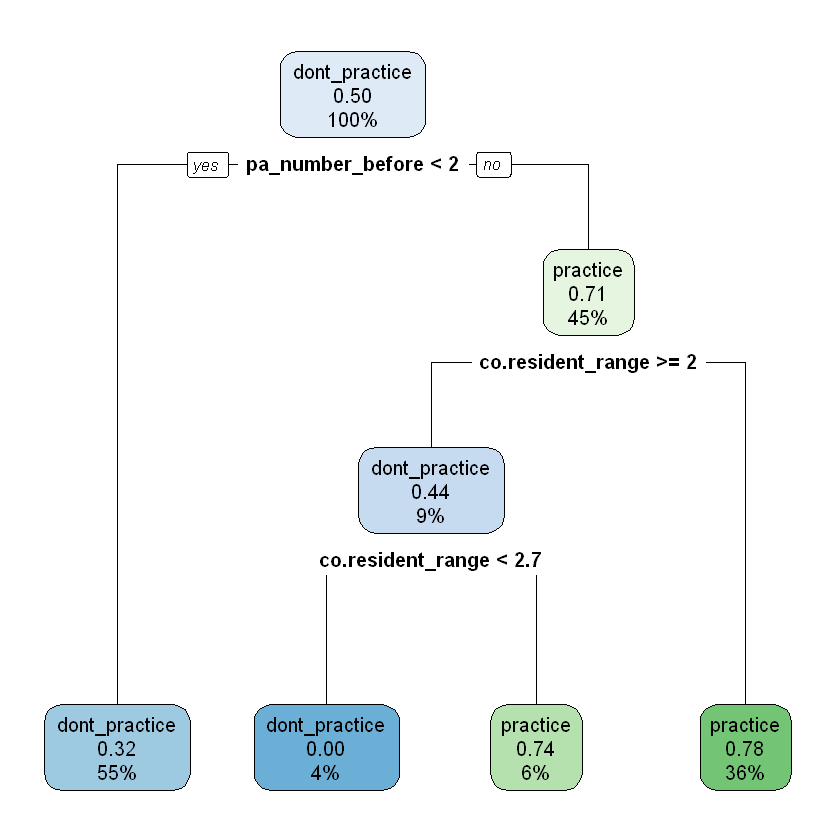

In [10]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)

In [11]:
print(model$result)

CART 

1254 samples
  73 predictor
   2 classes: 'dont_practice', 'practice' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1129, 1128, 1129, 1128, 1128, 1129, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.03508772  0.7321333  0.4641411
  0.03748006  0.7105968  0.4211205
  0.38915470  0.5773841  0.1571127

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.03508772.


## Output variable: sedentary time range

In [10]:
table(sedentary_dataset[, "sedentary_time_range_during"])


   8_hour_or_more less_then_8_hours 
              437               805 

### Creating dataset partition

In [11]:
set.seed(2)
lista_treino <- createDataPartition(sedentary_dataset$sedentary_time_range_during, p=0.7, list=FALSE)
treino <- sedentary_dataset[lista_treino,]
teste <- sedentary_dataset[-lista_treino,]

### Applying augmentation into the training set

In [13]:
treino.aug <- data_augmentation(
    train_data=treino,
    yname="sedentary_time_range_during",
    maj_class = "less_then_8_hours",
    min_classes = c("8_hour_or_more"),
    ycol=match("sedentary_time_range_during",names(sedentary_dataset))
)

table(treino.aug[, "sedentary_time_range_during"])


### Kappa metric without augmentation

In [19]:
table(sedentary_dataset[, "sedentary_time_range_during"])


 mais de 8 horas menos de 8 horas 
             437              805 

Confusion Matrix and Statistics

                  Reference
Prediction         mais de 8 horas menos de 8 horas
  mais de 8 horas               67               38
  menos de 8 horas              64              203
                                          
               Accuracy : 0.7258          
                 95% CI : (0.6774, 0.7705)
    No Information Rate : 0.6478          
    P-Value [Acc > NIR] : 0.0008209       
                                          
                  Kappa : 0.3706          
                                          
 Mcnemar's Test P-Value : 0.0133099       
                                          
            Sensitivity : 0.5115          
            Specificity : 0.8423          
         Pos Pred Value : 0.6381          
         Neg Pred Value : 0.7603          
             Prevalence : 0.3522          
         Detection Rate : 0.1801          
   Detection Prevalence : 0.2823          
      Balanced Accuracy : 0.6769          
         

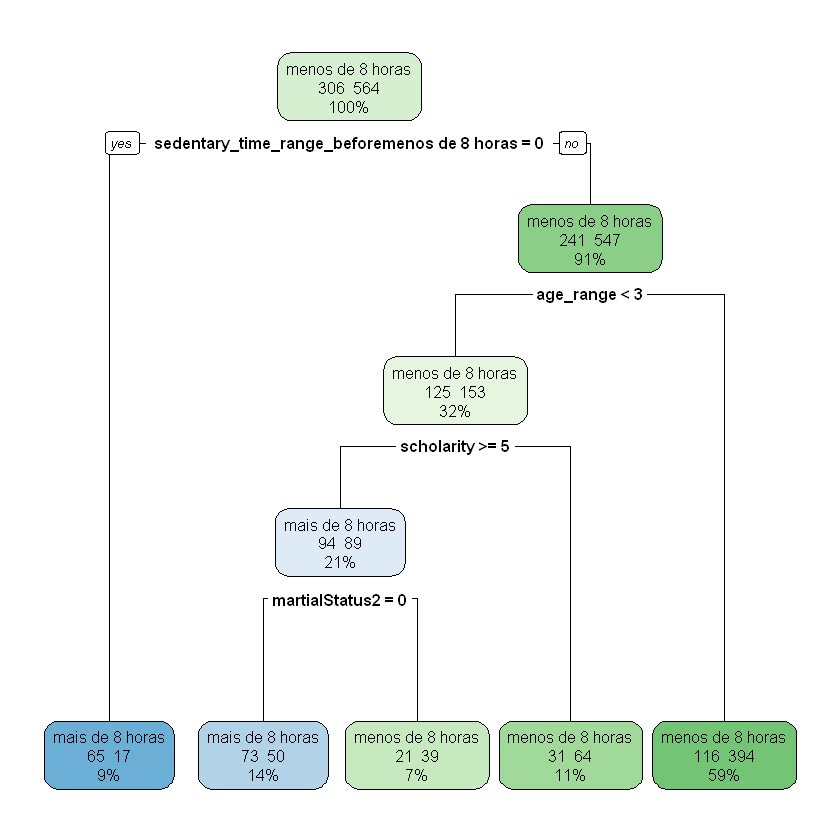

In [21]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)



### Kappa metric with augmentation

In [1]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino.aug,
    test_data=teste,
    yname="sedentary_time_range_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, extra=101)



ERROR: Error in table(sedentary_dataset[, "scholarity"]): objeto 'sedentary_dataset' não encontrado
